![title](UCN ICI.png)

 #  <font color='#7E9BC0'> Promedio Móvil y Suavización Exponencial. </font>

<div class="alert alert-info"> </h4> **Material preparado para la carrera de Ingeniería Civil Industrial | Universidad Católica del Norte | Escuela de Ingeniería - Campus Coquimbo | Curso - Adminitración de la Producción 2.**
</h4> </div>


<div class="alert alert-block alert-warning">

<b> **Autor:**</b> 
Este material es una recopilacion de trabajos de clases y proyectos realizados por Sergio Correa Santis. Si necestita mayor información o quiere utilizar este material en forma parcial o total, solo debe utilizar la correspondiente referencia o escribir a **sergio.correa@ucn.cl**.  
</div>

Documentación:
- Método de Suvaización Exponencial Simple, Statsmodels: [SimpleExpSmoothing](https://www.statsmodels.org/dev/generated/statsmodels.tsa.holtwinters.SimpleExpSmoothing.html?highlight=simpleexpsmoothing#statsmodels.tsa.holtwinters.SimpleExpSmoothing)
- Método deSuvaización Exponencial Simple Fit, Statsmodels: [SimpleExpSmoothing.fit](https://www.statsmodels.org/dev/generated/statsmodels.tsa.holtwinters.SimpleExpSmoothing.fit.html#statsmodels.tsa.holtwinters.SimpleExpSmoothing.fit)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
excel=pd.ExcelFile('Data_1.xlsx')
#('/Users/sergiocorreasantis/Desktop/Python/archivos/Data_pronostico-Hanke.xlsx')
original =pd.read_excel(excel,'Hoja1')
df=original.copy()
df.head()

,Periodo,Mes,Demanda
0,1,Ene,37.0
1,2,Feb,40.0
2,3,Mar,41.0
3,4,Abr,37.0
4,5,May,45.0


In [3]:
df =pd.read_excel('Data_1.xlsx')
df.head()

,Periodo,Mes,Demanda
0,1,Ene,37.0
1,2,Feb,40.0
2,3,Mar,41.0
3,4,Abr,37.0
4,5,May,45.0


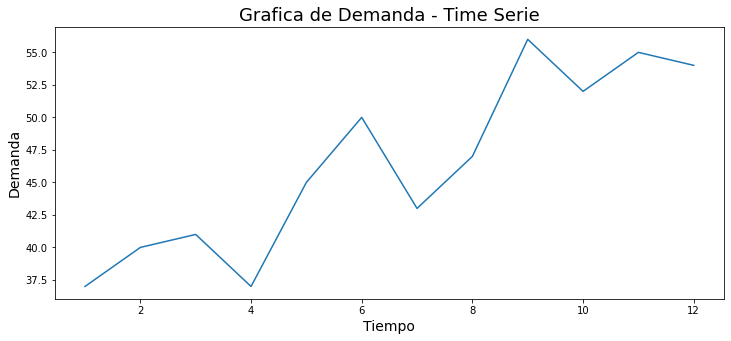

In [4]:
plt.figure(figsize=(12,5))
plt.plot(df['Periodo'],df['Demanda'])

#Nombres de gráfico y ejes.
plt.xlabel("Tiempo",fontsize=14)
plt.ylabel("Demanda",fontsize=14)
plt.title("Grafica de Demanda - Time Serie",fontsize=18)
plt.show()

 ##  <font color='#7E9BC0'> Promedio Móvil - Moving Average  </font>

In [5]:
df['MA']=df['Demanda'].rolling(window=3).mean().shift(1)
display(df)
ma_model = df['MA']

,Periodo,Mes,Demanda,MA
0,1,Ene,37.0,NaN
1,2,Feb,40.0,NaN
2,3,Mar,41.0,NaN
3,4,Abr,37.0,39.333333
4,5,May,45.0,39.333333
5,6,Jun,50.0,41.000000
6,7,Jul,43.0,44.000000
7,8,Ago,47.0,46.000000
8,9,Sep,56.0,46.666667
9,10,Oct,52.0,48.666667


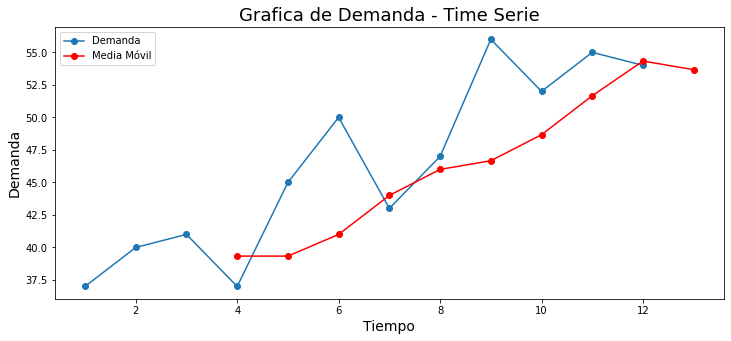

In [6]:
plt.figure(figsize=(12,5))
plt.plot(df['Periodo'],df['Demanda'],'o-',label="Demanda")
plt.plot(df['Periodo'],df['MA'],'o-',color="red",label="Media Móvil")

#Nombres de gráfico y ejes.
plt.xlabel("Tiempo",fontsize=14)
plt.ylabel("Demanda",fontsize=14)
plt.title("Grafica de Demanda - Time Serie",fontsize=18)
plt.legend(loc='best')
plt.show()

In [7]:
# Cómo exportar los datos a Excel.
#df.to_excel("Pronóstico 1.xlsx")

 ##  <font color='#7E9BC0'> Calculo de los errores - MSE, RMSE, MAD y MAPE  </font>

In [8]:
from sklearn.metrics import mean_squared_error as MSE

In [9]:
df['Demanda'][3:12]

3     37.0
4     45.0
5     50.0
6     43.0
7     47.0
8     56.0
9     52.0
10    55.0
11    54.0
Name: Demanda, dtype: float64

In [10]:
df['MA'][3:12]

3     39.333333
4     39.333333
5     41.000000
6     44.000000
7     46.000000
8     46.666667
9     48.666667
10    51.666667
11    54.333333
Name: MA, dtype: float64

In [11]:
y_true=df['Demanda'][3:12]
y_pred=df['MA'][3:12]
mse=round(MSE(y_true, y_pred),2)
mse

25.56

In [12]:
#RMSE
rmse=round(mse**0.5,2)
rmse

5.06

In [13]:
#RMSE
import math
rmse=round(math.sqrt(mse),2)
rmse

5.06

In [14]:
#MAD
from sklearn.metrics import mean_absolute_error as MAD
y_true=df['Demanda'][3:12]
y_pred=df['MA'][3:12]
mad=round(MAD(y_true, y_pred),2)
mad

3.93

In [15]:
#MAD y MAPE - no sklearn.
mad = round(np.mean(np.absolute(y_true-y_pred)),2)
print("Mean Absolute Desviation - MAD: ",mad)

mape=round(np.mean(np.absolute(y_true-y_pred)/y_true),3)*100
print("Mean Percentage Error Absolute- MAPE: ",mape,"%")

Mean Absolute Desviation - MAD:  3.93
Mean Percentage Error Absolute- MAPE:  7.9 %


 ##  <font color='#7E9BC0'> Suavización Exponencial Simple - Exponencial Smooth  </font>

In [16]:
# Volver a utilizar datos originales:
df=original.copy()
y_true=df['Demanda'][:12]
y_true

0     37.0
1     40.0
2     41.0
3     37.0
4     45.0
5     50.0
6     43.0
7     47.0
8     56.0
9     52.0
10    55.0
11    54.0
Name: Demanda, dtype: float64

In [17]:
from statsmodels.tsa.api import SimpleExpSmoothing

mod = SimpleExpSmoothing(y_true).fit(smoothing_level=0.2,optimized=False)
pred=mod.forecast(3)
pred

12    49.546933
13    49.546933
14    49.546933
dtype: float64

In [18]:
#Valores para los periodos anteriores.
mod.fittedvalues

0     37.000000
1     37.000000
2     37.600000
3     38.280000
4     38.024000
5     39.419200
6     41.535360
7     41.828288
8     42.862630
9     45.490104
10    46.792083
11    48.433667
dtype: float64

In [19]:
#Todos los valores pronosticados.
mod.fittedfcast

array([37.        , 37.        , 37.6       , 38.28      , 38.024     ,
       39.4192    , 41.53536   , 41.828288  , 42.8626304 , 45.49010432,
       46.79208346, 48.43366676, 49.54693341])

In [20]:
#Valores utilizados
mod.params_formatted

,name,param,optimized
smoothing_level,alpha,0.2,False
initial_level,l.0,37.0,False


In [21]:
df['SES']=mod.fittedvalues.append(pred)

In [22]:
df['Predicción']=pred

In [23]:
for n in range(pred.index[0],pred.index[-1]+1):
    try:
        SES=df.iloc[n][3]
        mes=df.iloc[n-12][1]
    except:
        SES='Nan'
    df.loc[n] = [n+1, mes, 'Nan',SES,round(pred[n],4)]
df

,Periodo,Mes,Demanda,SES,Predicción
0,1,Ene,37,37,NaN
1,2,Feb,40,37,NaN
2,3,Mar,41,37.6,NaN
3,4,Abr,37,38.28,NaN
4,5,May,45,38.024,NaN
5,6,Jun,50,39.4192,NaN
6,7,Jul,43,41.5354,NaN
7,8,Ago,47,41.8283,NaN
8,9,Sep,56,42.8626,NaN
9,10,Oct,52,45.4901,NaN


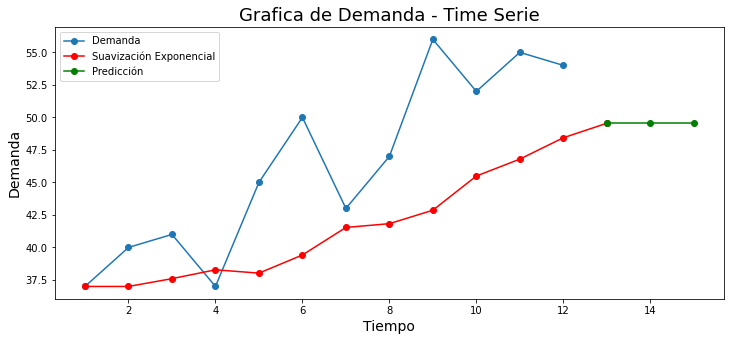

In [24]:
plt.figure(figsize=(12,5))
plt.plot(df['Periodo'],df['Demanda'],'o-',label="Demanda")
plt.plot(df['Periodo'],df['SES'],'o-',color="red",label="Suavización Exponencial")
plt.plot(df['Periodo'],df['Predicción'],'o-',color="green",label="Predicción")

#Nombres de gráfico y ejes.
plt.xlabel("Tiempo",fontsize=14)
plt.ylabel("Demanda",fontsize=14)
plt.title("Grafica de Demanda - Time Serie",fontsize=18)
plt.legend(loc='best')
plt.show()

##  <font color='#7E9BC0'> Suavización Exponencial Simple - Estimación del Error </font>

In [25]:
y_true=df["Demanda"][:12]
y_pred=df["SES"][:12]

In [26]:
from sklearn.metrics import mean_squared_error as MSE

#MSE
mse=round(MSE(y_true, y_pred),2)
print("Mean Squared Error - MSE: ",mse)

#RMSE
rmse= round(math.sqrt(mse),2)
print("Root Mean Squared Error - RMSE: ",rmse)

#MAD.
mad = round(np.mean(np.absolute(y_true-y_pred)),2)
print("Mean Absolute Desviation - MAD: ",mad)

#MAPE
mape=round(np.mean(np.absolute(y_true-y_pred)/y_true),3)*100
print("Mean Percentage Error Absolute- MAPE: ",mape,"%")

Mean Squared Error - MSE:  43.75
Root Mean Squared Error - RMSE:  6.61
Mean Absolute Desviation - MAD:  5.44
Mean Percentage Error Absolute- MAPE:  11.0 %


##  <font color='#7E9BC0'> Suavización Exponencial Simple v/s Moving Average </font>

In [27]:
df=original.copy()
y_true=df['Demanda'][0:12]
y_true

n=len(y_true)

alpha=2/(n-1)
alpha

0.18181818181818182

In [28]:
y_true

0     37.0
1     40.0
2     41.0
3     37.0
4     45.0
5     50.0
6     43.0
7     47.0
8     56.0
9     52.0
10    55.0
11    54.0
Name: Demanda, dtype: float64

In [29]:
#Suavización exponencial simple:

mod1 = SimpleExpSmoothing(y_true).fit(smoothing_level=alpha,optimized=False)
pred1=mod1.forecast(1)

In [30]:
prediction1=mod.fittedvalues.append(pred1)
prediction1

0     37.000000
1     37.000000
2     37.600000
3     38.280000
4     38.024000
5     39.419200
6     41.535360
7     41.828288
8     42.862630
9     45.490104
10    46.792083
11    48.433667
12    48.960007
dtype: float64

In [31]:
mod2 = SimpleExpSmoothing(y_true).fit(smoothing_level=0.6,optimized=False)
pred2=mod2.forecast(1)
prediction2=mod.fittedvalues.append(pred2)
prediction2

0     37.000000
1     37.000000
2     37.600000
3     38.280000
4     38.024000
5     39.419200
6     41.535360
7     41.828288
8     42.862630
9     45.490104
10    46.792083
11    48.433667
12    53.920695
dtype: float64

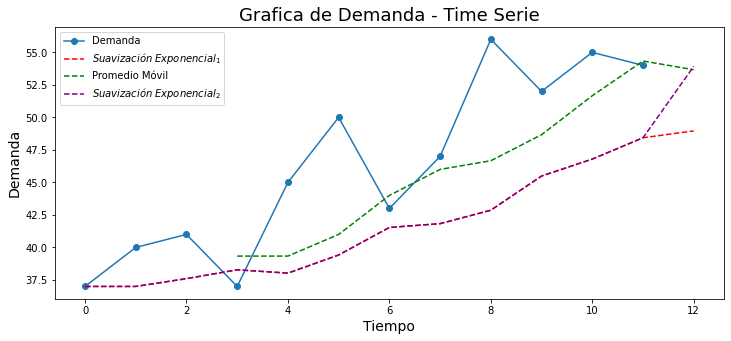

In [32]:
plt.figure(figsize=(12,5))
plt.plot(y_true,'o-',label="Demanda")
plt.plot(prediction1,'--',color="red",label=r"$Suavización \;Exponencial_1$")
plt.plot(ma_model,'--',color="green",label="Promedio Móvil")
plt.plot(prediction2,'--',color="purple",label=r"$Suavización \;Exponencial_2$")

#Nombres de gráfico y ejes.
plt.xlabel("Tiempo",fontsize=14)
plt.ylabel("Demanda",fontsize=14)
plt.title("Grafica de Demanda - Time Serie",fontsize=18)
plt.legend(loc='best')
plt.show()

##  <font color='#7E9BC0'> Suavización Exponencial Simple Parametros </font>

In [33]:
df=original.copy()
y_true=df['Demanda'][0:12]
y_true

0     37.0
1     40.0
2     41.0
3     37.0
4     45.0
5     50.0
6     43.0
7     47.0
8     56.0
9     52.0
10    55.0
11    54.0
Name: Demanda, dtype: float64

In [34]:
mod1 = SimpleExpSmoothing(y_true).fit(smoothing_level=0.1,optimized=False)
pred1=mod1.forecast(1)

mod2 = SimpleExpSmoothing(y_true).fit(smoothing_level=0.2,optimized=False)
pred2=mod2.forecast(1)

mod3 = SimpleExpSmoothing(y_true).fit(smoothing_level=0.4,optimized=False)
pred3=mod3.forecast(1)

mod4 = SimpleExpSmoothing(y_true).fit(smoothing_level=0.5,optimized=False)
pred4 =mod4.forecast(1)

mod5  = SimpleExpSmoothing(y_true).fit(smoothing_level=0.6,optimized=False)
pred5 = mod5.forecast(1)

mod6 = SimpleExpSmoothing(y_true).fit(smoothing_level=0.7,optimized=False)
pred6=mod6.forecast(1)

In [35]:
# Add values:
df['SES1']=mod1.fittedvalues.append(pred1)
df['SES2']=mod2.fittedvalues.append(pred2)
df['SES3']=mod3.fittedvalues.append(pred3)
df['SES4']=mod4.fittedvalues.append(pred4)
df['SES5']=mod5.fittedvalues.append(pred5)
df['SES6']=mod6.fittedvalues.append(pred6)

In [36]:
df

,Periodo,Mes,Demanda,SES1,SES2,SES3,SES4,SES5,SES6
0,1,Ene,37.0,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000
1,2,Feb,40.0,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000
2,3,Mar,41.0,37.300000,37.600000,38.200000,38.500000,38.800000,39.100000
3,4,Abr,37.0,37.670000,38.280000,39.320000,39.750000,40.120000,40.430000
4,5,May,45.0,37.603000,38.024000,38.392000,38.375000,38.248000,38.029000
5,6,Jun,50.0,38.342700,39.419200,41.035200,41.687500,42.299200,42.908700
6,7,Jul,43.0,39.508430,41.535360,44.621120,45.843750,46.919680,47.872610
7,8,Ago,47.0,39.857587,41.828288,43.972672,44.421875,44.567872,44.461783
8,9,Sep,56.0,40.571828,42.862630,45.183603,45.710938,46.027149,46.238535
9,10,Oct,52.0,42.114645,45.490104,49.510162,50.855469,52.010860,53.071560


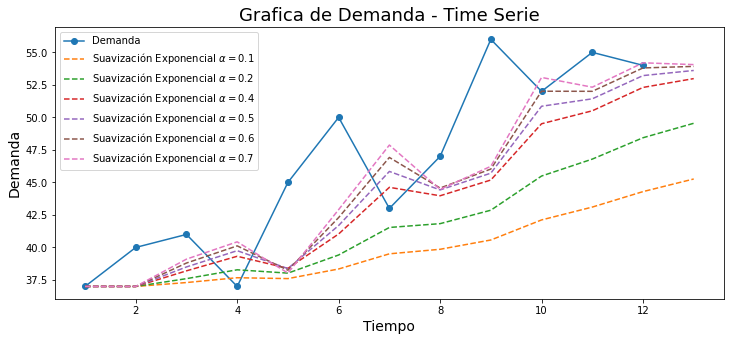

In [37]:
plt.figure(figsize=(12,5))
plt.plot(df['Periodo'],df['Demanda'],'o-',label="Demanda")
plt.plot(df['Periodo'],df['SES1'],'--',label=r'Suavización Exponencial $\alpha=0.1$')
plt.plot(df['Periodo'],df['SES2'],'--',label=r"Suavización Exponencial $\alpha=0.2$")
plt.plot(df['Periodo'],df['SES3'],'--',label=r"Suavización Exponencial $\alpha=0.4$")
plt.plot(df['Periodo'],df['SES4'],'--',label=r"Suavización Exponencial $\alpha=0.5$")
plt.plot(df['Periodo'],df['SES5'],'--',label=r"Suavización Exponencial $\alpha=0.6$")
plt.plot(df['Periodo'],df['SES6'],'--',label=r"Suavización Exponencial $\alpha=0.7$")


#Nombres de gráfico y ejes.
plt.xlabel("Tiempo",fontsize=14)
plt.ylabel("Demanda",fontsize=14)
plt.title("Grafica de Demanda - Time Serie",fontsize=18)
plt.legend(loc='best')
plt.show()

 ##  <font color='#7E9BC0'> Suavización Exponencial Simple - Exponencial Smooth Optimizado </font>

In [38]:
df=original.copy()
y_true=df['Demanda'][0:12]
y_true
mod  = SimpleExpSmoothing(y_true).fit(optimized=True,use_brute=True)
pred = mod.forecast(3)

In [39]:
mod.params_formatted

,name,param,optimized
smoothing_level,alpha,0.647928,True
initial_level,l.0,38.146788,True


In [40]:
df['SES']=mod.fittedvalues.append(pred)
df['Predicción']=pred

for n in range(pred.index[0],pred.index[-1]+1):
    try:
        SES=df.iloc[n][3]
        mes=df.iloc[n-12][1]
    except:
        SES='Nan'
    df.loc[n] = [n+1, mes, 'Nan',SES,round(pred[n],4)]
df

,Periodo,Mes,Demanda,SES,Predicción
0,1,Ene,37,38.1468,NaN
1,2,Feb,40,37.4038,NaN
2,3,Mar,41,39.0859,NaN
3,4,Abr,37,40.3261,NaN
4,5,May,45,38.171,NaN
5,6,Jun,50,42.5957,NaN
6,7,Jul,43,47.3932,NaN
7,8,Ago,47,44.5467,NaN
8,9,Sep,56,46.1363,NaN
9,10,Oct,52,52.5273,NaN


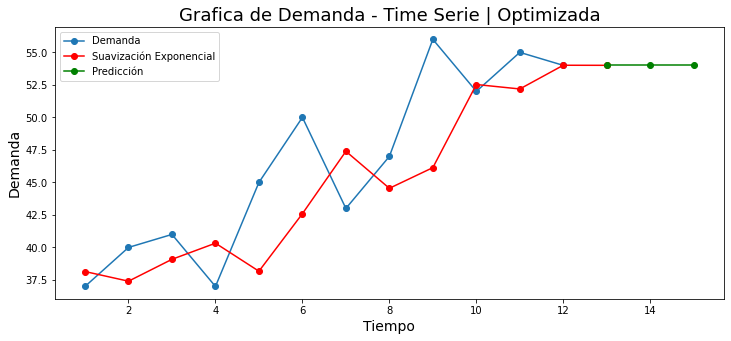

In [41]:
plt.figure(figsize=(12,5))
plt.plot(df['Periodo'],df['Demanda'],'o-',label="Demanda")
plt.plot(df['Periodo'],df['SES'],'o-',color="red",label="Suavización Exponencial")
plt.plot(df['Periodo'],df['Predicción'],'o-',color="green",label="Predicción")

#Nombres de gráfico y ejes.
plt.xlabel("Tiempo",fontsize=14)
plt.ylabel("Demanda",fontsize=14)
plt.title("Grafica de Demanda - Time Serie | Optimizada",fontsize=18)
plt.legend(loc='best')
plt.show()

In [42]:
y_true=df["Demanda"][:12]
y_pred=df["SES"][:12]

In [43]:
#MSE
mse=round(MSE(y_true, y_pred),2)
print("Mean Squared Error - MSE: ",mse)

#RMSE
rmse= round(math.sqrt(mse),2)
print("Root Mean Squared Error - RMSE: ",rmse)

#MAD.
mad = round(np.mean(np.absolute(y_true-y_pred)),2)
print("Mean Absolute Desviation - MAD: ",mad)

#MAPE
mape=round(np.mean(np.absolute(y_true-y_pred)/y_true),3)*100
print("Mean Percentage Error Absolute- MAPE: ",mape,"%")

Mean Squared Error - MSE:  21.25
Root Mean Squared Error - RMSE:  4.61
Mean Absolute Desviation - MAD:  3.61
Mean Percentage Error Absolute- MAPE:  7.7 %
